In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd '/content/drive/MyDrive/ASSESSMENT'

/content/drive/MyDrive/ASSESSMENT


In [6]:
%ls

 aqi_calculated.csv
 combined_output.csv
'Copy of PRSA_Data_Dongsi_20130301-20170228.csv'
'Copy of PRSA_Data_Gucheng_20130301-20170228.csv'
'Copy of PRSA_Data_Huairou_20130301-20170228.csv'
 PRSA_Data_Wanliu_20130301-20170228.csv


# **MERGING CSV FILES**

> Add blockquote



In [7]:
import pandas as pd
import glob

MERGING CSV. FILES

In [8]:
csv_files = glob.glob('/content/drive/MyDrive/ASSESSMENT/*.csv')

# Read and combine all CSV files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save to a new CSV file
combined_df.to_csv("combined_output.csv", index=False)

print("All CSV files have been merged into 'combined_output.csv'.")


All CSV files have been merged into 'combined_output.csv'.


# READING DATASET

In [11]:
def get_aqi_bucket(aqi):
    if aqi < 0 or aqi > 500:
        return "Invalid AQI value"

    if aqi <= 50:
        return {"bucket": "Good", "color": "Green", "message": "Air quality is satisfactory."}
    elif aqi <= 100:
        return {"bucket": "Moderate", "color": "Yellow", "message": "Acceptable; sensitive individuals should monitor symptoms."}
    elif aqi <= 150:
        return {"bucket": "Unhealthy for Sensitive Groups", "color": "Orange", "message": "Sensitive people may experience health effects."}
    elif aqi <= 200:
        return {"bucket": "Unhealthy", "color": "Red", "message": "Everyone may begin to experience health effects."}
    elif aqi <= 300:
        return {"bucket": "Very Unhealthy", "color": "Purple", "message": "Health alert: serious effects for everyone."}
    else:  # 301–500
        return {"bucket": "Hazardous", "color": "Maroon", "message": "Emergency conditions: entire population affected."}

# Example usage:
aqi_value = 178
result = get_aqi_bucket(aqi_value)
print(f"AQI: {aqi_value}, Category: {result['bucket']}, Color: {result['color']}, Message: {result['message']}")


AQI: 178, Category: Unhealthy, Color: Red, Message: Everyone may begin to experience health effects.


In [12]:
df = pd.read_csv('combined_output.csv')# Replace with the actual file name
df2 = df.drop_duplicates()
df2 # shows the first 5 and last 5 rows together

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,NaN
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,NaN
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,NaN
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,NaN
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524603,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi,108.0
2524604,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi,63.0
2524605,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi,74.0
2524606,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi,74.0


In [13]:
df2.head()#shows first 5 rows

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,NaN
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,NaN
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,NaN
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,NaN
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,NaN


In [14]:
df2.tail()#shows last 5 rows

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
2524603,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi,108.0
2524604,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi,63.0
2524605,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi,74.0
2524606,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi,74.0
2524607,35064,2017,2,28,23,30.0,71.0,11.0,87.0,1200.0,4.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Dongsi,89.0


# Exploratory Data Analysis

Step 2: **Understand the Data Structure**

In [15]:
df2.shape

(278912, 19)

In [16]:
df2.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'AQI'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 0 to 140255
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    137525 non-null  float64
 6   PM10     138261 non-null  float64
 7   SO2      137531 non-null  float64
 8   NO2      135278 non-null  float64
 9   CO       132424 non-null  float64
 10  O3       135605 non-null  float64
 11  TEMP     140114 non-null  float64
 12  PRES     140113 non-null  float64
 13  DEWP     140112 non-null  float64
 14  RAIN     140118 non-null  float64
 15  wd       139594 non-null  object 
 16  WSPM     140137 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 20.3+ MB


In [17]:
df2.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,3862
PM10,2390
SO2,3850
NO2,8356
CO,14064


In [18]:
df2.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,AQI
count,278912.000000,278912.000000,278912.000000,278912.000000,278912.000000,275050.000000,276522.000000,275062.000000,270556.000000,264848.000000,271210.000000,278628.000000,278626.000000,278624.000000,278636.000000,278674.000000,138656.000000
mean,17531.979452,2014.662363,6.524517,15.731360,11.499014,80.787633,107.831910,16.108619,51.917635,1247.705756,55.960789,13.336479,1010.035796,2.623680,0.066179,1.589224,167.612112
std,10117.663456,1.176988,3.450964,8.799536,6.922993,81.104479,93.499115,21.627072,36.087849,1157.287079,56.377823,11.474517,10.364461,13.839266,0.844670,1.201377,83.396485
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000,3.000000
25%,8772.000000,2014.000000,4.000000,8.000000,5.000000,21.000000,37.000000,2.856000,23.000000,500.000000,10.000000,3.000000,1001.600000,-8.900000,0.000000,0.800000,102.000000
50%,17532.000000,2015.000000,7.000000,16.000000,11.000000,56.000000,86.000000,8.000000,45.000000,900.000000,43.000000,14.300000,1009.700000,3.200000,0.000000,1.300000,164.000000
75%,26281.000000,2016.000000,10.000000,23.000000,18.000000,112.000000,151.000000,20.000000,73.497400,1500.000000,80.000000,23.000000,1018.200000,15.400000,0.000000,2.100000,210.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,994.000000,500.000000,276.000000,10000.000000,1071.000000,41.600000,1042.000000,29.100000,72.500000,12.900000,500.000000


In [19]:
df2.describe(include=['object'])

,wd,station
count,277589,278912
unique,16,4
top,NE,Wanliu
freq,31086,69925


# **DATA CLEANING**

In [20]:
#Handle missing values:
#Drop rows (if needed):
df_cleaned = df2.dropna()
display(df_cleaned)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
2384352,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,48.0
2384353,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,46.0
2384357,6,2013,3,1,5,3.0,6.0,8.0,17.0,300.0,54.0,-2.2,1025.6,-19.6,0.0,N,3.7,Wanliu,50.0
2384358,7,2013,3,1,6,3.0,3.0,10.0,21.0,300.0,52.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Wanliu,48.0
2384359,8,2013,3,1,7,3.0,6.0,11.0,26.0,300.0,47.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Wanliu,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524603,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi,108.0
2524604,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi,63.0
2524605,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi,74.0
2524606,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi,74.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**FINDING NUMBER OF CITIES IN THE DATASET**

In [22]:
cities = df['station'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
cities

Total number of cities in the dataset : 4


,count
station,
Wanliu,1157112
Gucheng,1157112
Huairou,1157112
Dongsi,1157112


**CREATING A COLUMN DATE AND CONVERTING TO YY/MM/DD**

In [ ]:
df['Date'] = pd.to_datetime(df[['year','month','day']])
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

,Date
0,2013-03-01
1,2013-03-01
2,2013-03-01
3,2013-03-01
4,2013-03-01
...,...
2244091,2017-02-28
2244092,2017-02-28
2244093,2017-02-28
2244094,2017-02-28


In [ ]:
# convert 'Date' to datetime format as in the original dataframe the type of date column is object
df['Date']
df['Date'] = pd.to_datetime(df['Date'])
#df['month']=pd.DatetimeIndex(df['Date']).month #making a new column by extracting month part of the Date column in cities dataframe
#df['Year']=pd.DatetimeIndex(df['Date']).year ##making a new column by extracting year part of the Date column in cities dataframe

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,2013-03-01
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,2013-03-01
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,2013-03-01
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,2013-03-01
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,2013-03-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244096 entries, 0 to 2244095
Data columns (total 19 columns):
 #   Column   Dtype         
---  ------   -----         
 0   No       int64         
 1   year     int64         
 2   month    int64         
 3   day      int64         
 4   hour     int64         
 5   PM2.5    float64       
 6   PM10     float64       
 7   SO2      float64       
 8   NO2      float64       
 9   CO       float64       
 10  O3       float64       
 11  TEMP     float64       
 12  PRES     float64       
 13  DEWP     float64       
 14  RAIN     float64       
 15  wd       object        
 16  WSPM     float64       
 17  station  object        
 18  Date     datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(5), object(2)
memory usage: 325.3+ MB


**LOOKING AT MISSING VALUES**

In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        print(mis_val_table)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Blues')

              0         1
No            0  0.000000
year          0  0.000000
month         0  0.000000
day           0  0.000000
hour          0  0.000000
PM2.5     43696  1.947154
PM10      31920  1.422399
SO2       43600  1.942876
NO2       79648  3.549224
CO       125312  5.584075
O3        74416  3.316079
TEMP       2272  0.101243
PRES       2288  0.101956
DEWP       2304  0.102669
RAIN       2208  0.098392
wd        10592  0.471994
WSPM       1904  0.084845
station       0  0.000000
Date          0  0.000000


,Missing Values,% of Total Values
CO,125312,5.584075
NO2,79648,3.549224
O3,74416,3.316079
PM2.5,43696,1.947154
SO2,43600,1.942876
PM10,31920,1.422399
wd,10592,0.471994
DEWP,2304,0.102669
PRES,2288,0.101956
TEMP,2272,0.101243


In [ ]:
df['PM2.5']=df['PM2.5']
df['PM10']= df['PM10']
df['Nitrous Dioxide']=df['NO2']
df['Carbon Monoxide']=df['CO']
df['Sulphur Dioxide']=df['SO2']
df['Ozone']=df['O3']
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,RAIN,wd,WSPM,station,Date,PM,Nitrous Dioxide,Carbon Monoxide,Sulphur Dioxide,Ozone
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,...,0.0,NNW,4.4,Wanliu,2013-03-01,16.0,28.0,400.0,6.0,52.0
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,...,0.0,N,4.7,Wanliu,2013-03-01,18.0,28.0,400.0,6.0,50.0
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,...,0.0,NNW,5.6,Wanliu,2013-03-01,9.0,19.0,400.0,NaN,55.0
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,...,0.0,NW,3.1,Wanliu,2013-03-01,41.0,14.0,NaN,8.0,NaN
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,...,0.0,N,2.0,Wanliu,2013-03-01,16.0,NaN,300.0,9.0,54.0


**CREATING NEW DATAFRAME WITH AIR QUALITIES**

In [ ]:
selected_columns = ['station', 'Date', 'month', 'year','PM', 'SO2','NO2', 'CO', 'O3','TEMP','RAIN', 'PRES','DEWP','WSPM']

# Create a new DataFrame with only the selected columns
df1 = df[selected_columns]

# Display the first few rows of the new DataFrame
df1.head()

,station,Date,month,year,PM,SO2,NO2,CO,O3,TEMP,RAIN,PRES,DEWP,WSPM
0,Wanliu,2013-03-01,3,2013,16.0,6.0,28.0,400.0,52.0,-0.7,0.0,1023.0,-18.8,4.4
1,Wanliu,2013-03-01,3,2013,18.0,6.0,28.0,400.0,50.0,-1.1,0.0,1023.2,-18.2,4.7
2,Wanliu,2013-03-01,3,2013,9.0,NaN,19.0,400.0,55.0,-1.1,0.0,1023.5,-18.2,5.6
3,Wanliu,2013-03-01,3,2013,41.0,8.0,14.0,NaN,NaN,-1.4,0.0,1024.5,-19.4,3.1
4,Wanliu,2013-03-01,3,2013,16.0,9.0,NaN,300.0,54.0,-2.0,0.0,1025.2,-19.5,2.0


In [ ]:
# Missing values
def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df1.isnull().sum() / len(df1)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df1)
missing_values.style.background_gradient(cmap='Greens')

,Missing Values,% of Total Values
CO,125312,5.584075
NO2,79648,3.549224
O3,74416,3.316079
PM,45024,2.006331
SO2,43600,1.942876
DEWP,2304,0.102669
PRES,2288,0.101956
TEMP,2272,0.101243
RAIN,2208,0.098392
WSPM,1904,0.084845


**IMPUTING MISSING VALUES**


**Mean** :
Finding the mean and replacing missing values with the mean


In [ ]:
pollutants = ['PM','SO2','NO2', 'CO', 'O3','TEMP','RAIN', 'PRES','DEWP','WSPM']
dff= df1.groupby(['year','month','station'])[pollutants].mean().reset_index()
dff

,year,month,station,PM,SO2,NO2,CO,O3,TEMP,RAIN,PRES,DEWP,WSPM
0,2013,3,Dongsi,239.497305,39.831952,76.904376,1529.192616,59.489526,6.256989,0.020968,1014.456855,-7.030511,1.969624
1,2013,3,Gucheng,255.768606,38.202755,76.913542,1624.285513,59.124166,6.329032,0.020161,1010.526075,-6.514785,1.427554
2,2013,3,Huairou,216.681502,33.073560,51.701720,1202.575071,61.879593,4.819624,0.017473,1009.515188,-7.575000,2.030511
3,2013,3,Wanliu,256.139865,43.533330,88.493135,1684.334795,39.668154,6.053629,0.026210,1012.547446,-5.729435,1.997849
4,2013,4,Dongsi,163.749652,22.404388,43.961095,966.527697,69.612200,12.632361,0.012222,1009.933056,-3.778056,2.571389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2017,1,Wanliu,249.386486,20.237197,75.056604,2143.895748,30.475034,-1.267553,0.000136,1024.507572,-12.931105,1.889824
188,2017,2,Dongsi,180.416796,19.607634,51.419847,1183.128834,44.651908,2.661533,0.006101,1022.020585,-13.627679,1.953869
189,2017,2,Gucheng,171.202144,19.623077,54.538222,1292.735703,33.124043,2.365717,0.005804,1018.290179,-14.643006,2.072768
190,2017,2,Huairou,130.808511,10.316109,35.940819,1028.353659,58.382040,0.859921,0.006845,1016.851488,-13.763542,2.037798


In [ ]:
df1['PM']=df1['PM'].fillna((df1['PM'].median()))
#df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['TEMP']=df1['TEMP'].fillna((df1['TEMP'].median()))
df1['RAIN']=df1['RAIN'].fillna((df1['RAIN'].median()))
df1['PRES']=df1['PRES'].fillna((df1['PRES'].median()))
df1['DEWP']=df1['DEWP'].fillna((df1['DEWP'].median()))
df1['WSPM']=df1['WSPM'].fillna((df1['WSPM'].median()))

In [ ]:
df1

,station,Date,month,year,PM,SO2,NO2,CO,O3,TEMP,RAIN,PRES,DEWP,WSPM
0,Wanliu,2013-03-01,3,2013,16.0,6.0,28.0,400.0,52.0,-0.7,0.0,1023.0,-18.8,4.4
1,Wanliu,2013-03-01,3,2013,18.0,6.0,28.0,400.0,50.0,-1.1,0.0,1023.2,-18.2,4.7
2,Wanliu,2013-03-01,3,2013,9.0,8.0,19.0,400.0,55.0,-1.1,0.0,1023.5,-18.2,5.6
3,Wanliu,2013-03-01,3,2013,41.0,8.0,14.0,900.0,43.0,-1.4,0.0,1024.5,-19.4,3.1
4,Wanliu,2013-03-01,3,2013,16.0,9.0,45.0,300.0,54.0,-2.0,0.0,1025.2,-19.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244091,Dongsi,2017-02-28,2,2017,67.0,3.0,29.0,400.0,73.0,12.5,0.0,1013.5,-16.2,2.4
2244092,Dongsi,2017-02-28,2,2017,63.0,3.0,43.0,500.0,54.0,11.6,0.0,1013.6,-15.1,0.9
2244093,Dongsi,2017-02-28,2,2017,81.0,5.0,61.0,700.0,28.0,10.8,0.0,1014.2,-13.3,1.1
2244094,Dongsi,2017-02-28,2,2017,76.0,9.0,75.0,900.0,15.0,10.5,0.0,1014.4,-12.9,1.2


In [ ]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2244096,2015-02-28 23:59:59.999999744,2013-03-01 00:00:00,2014-03-01 00:00:00,2015-03-01 00:00:00,2016-02-29 00:00:00,2017-02-28 00:00:00,NaN
month,2244096.0,6.52293,1.0,4.0,7.0,10.0,12.0,3.448704
year,2244096.0,2014.66256,2013.0,2014.0,2015.0,2016.0,2017.0,1.177197
PM,2244096.0,187.786396,4.0,63.0,145.0,259.0,1761.0,167.500118
SO2,2244096.0,15.951079,0.2856,3.0,8.0,20.0,500.0,21.445139
NO2,2244096.0,51.672113,1.0265,24.0,45.0,72.0,276.0,35.464689
CO,2244096.0,1228.289606,100.0,500.0,900.0,1500.0,10000.0,1127.339804
O3,2244096.0,55.530999,0.2142,11.0,43.0,79.0,1071.0,55.483641
TEMP,2244096.0,13.353623,-19.9,3.0,14.3,23.0,41.6,11.470727
RAIN,2244096.0,0.066103,0.0,0.0,0.0,0.0,72.5,0.843167


# CREATING A NEW DATAFRAME CONTAINING THE POLLUTANTS ONLY

In [ ]:
pollutants = ['PM','SO2','NO2', 'CO', 'O3']

In [ ]:
df1.columns

Index(['station', 'Date', 'month', 'year', 'PM', 'SO2', 'NO2', 'CO', 'O3',
       'TEMP', 'RAIN', 'PRES', 'DEWP', 'WSPM'],
      dtype='object')

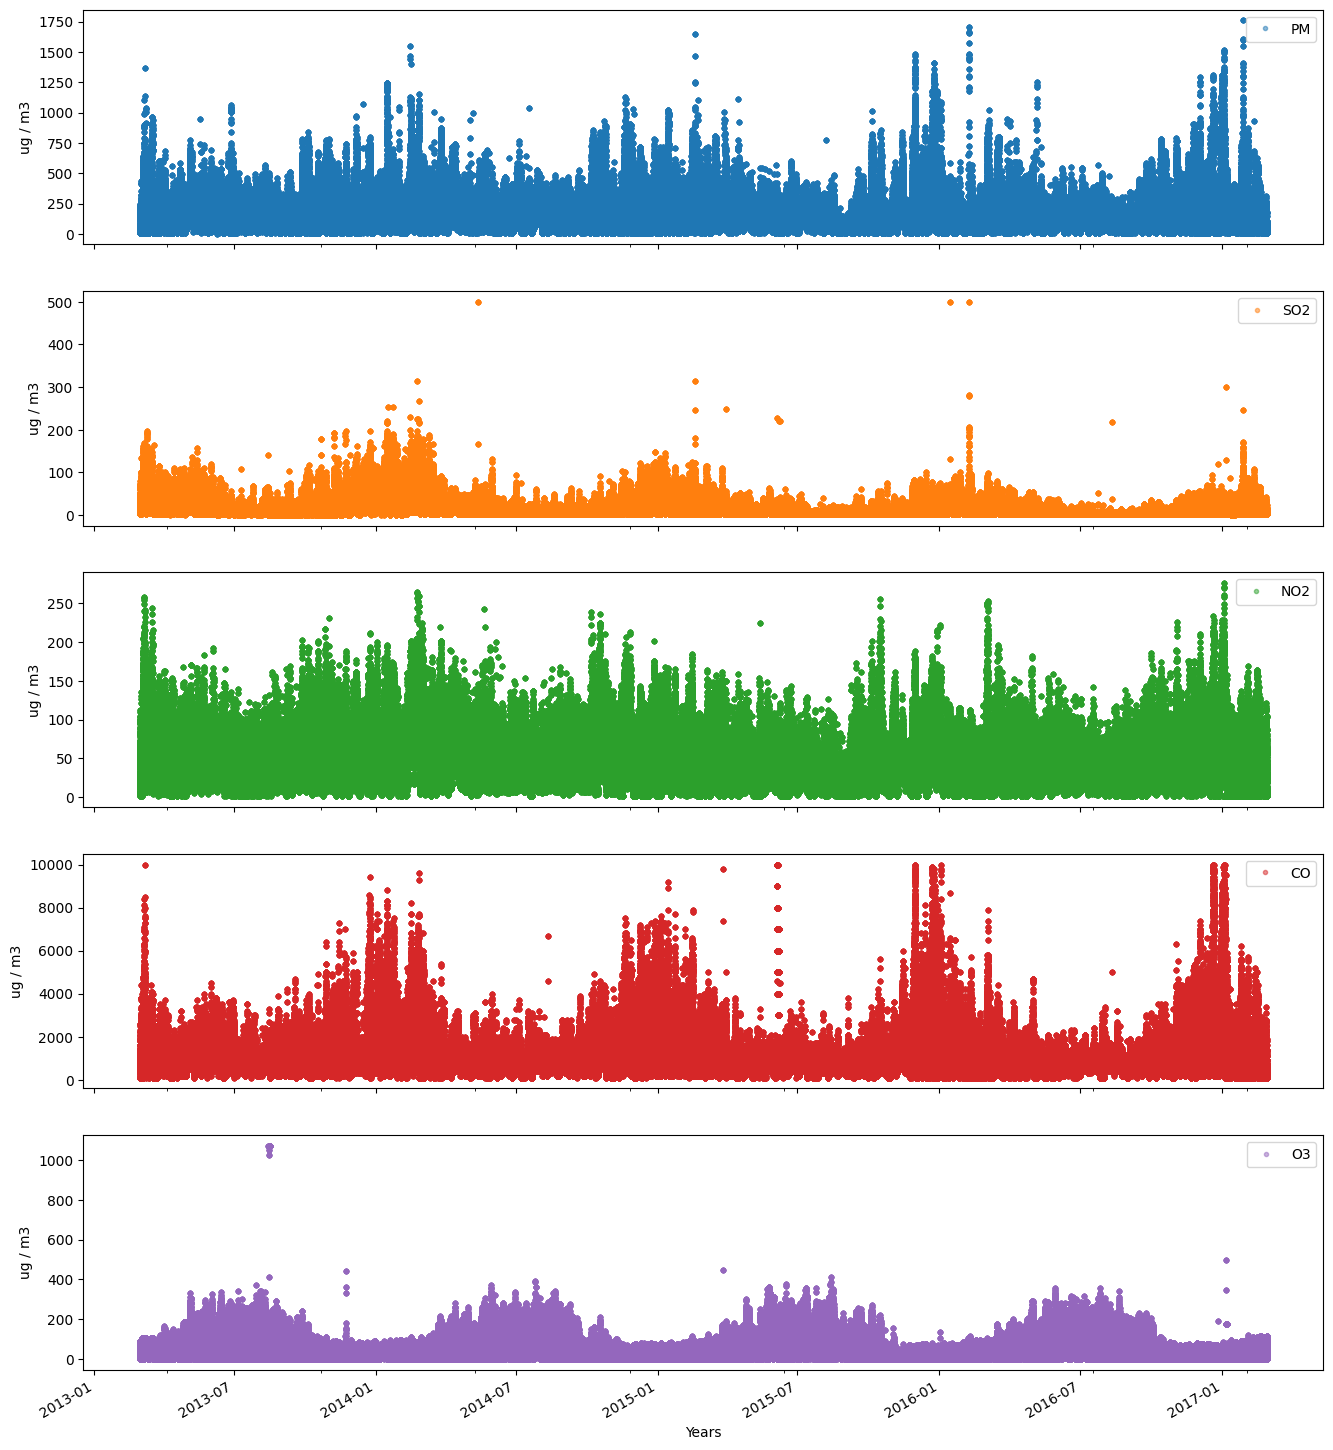

In [ ]:
df1.set_index('Date',inplace=True)
axes = df1[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

# MONTHWISE PLOTTING

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['PM', 'SO2', 'NO2', 'CO','O3',]
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
#df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year and month, and calculating mean for each pollutant
df1['Month'] = df1['Date'].dt.to_period('M')
df_monthly = df1.groupby('Month')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Pollutant Levels by Month"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_monthly.index.astype(str),  # Convert PeriodIndex to string for x-axis
            y=df_monthly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Month-wise Pollutant Levels",
    xaxis_title="Month",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


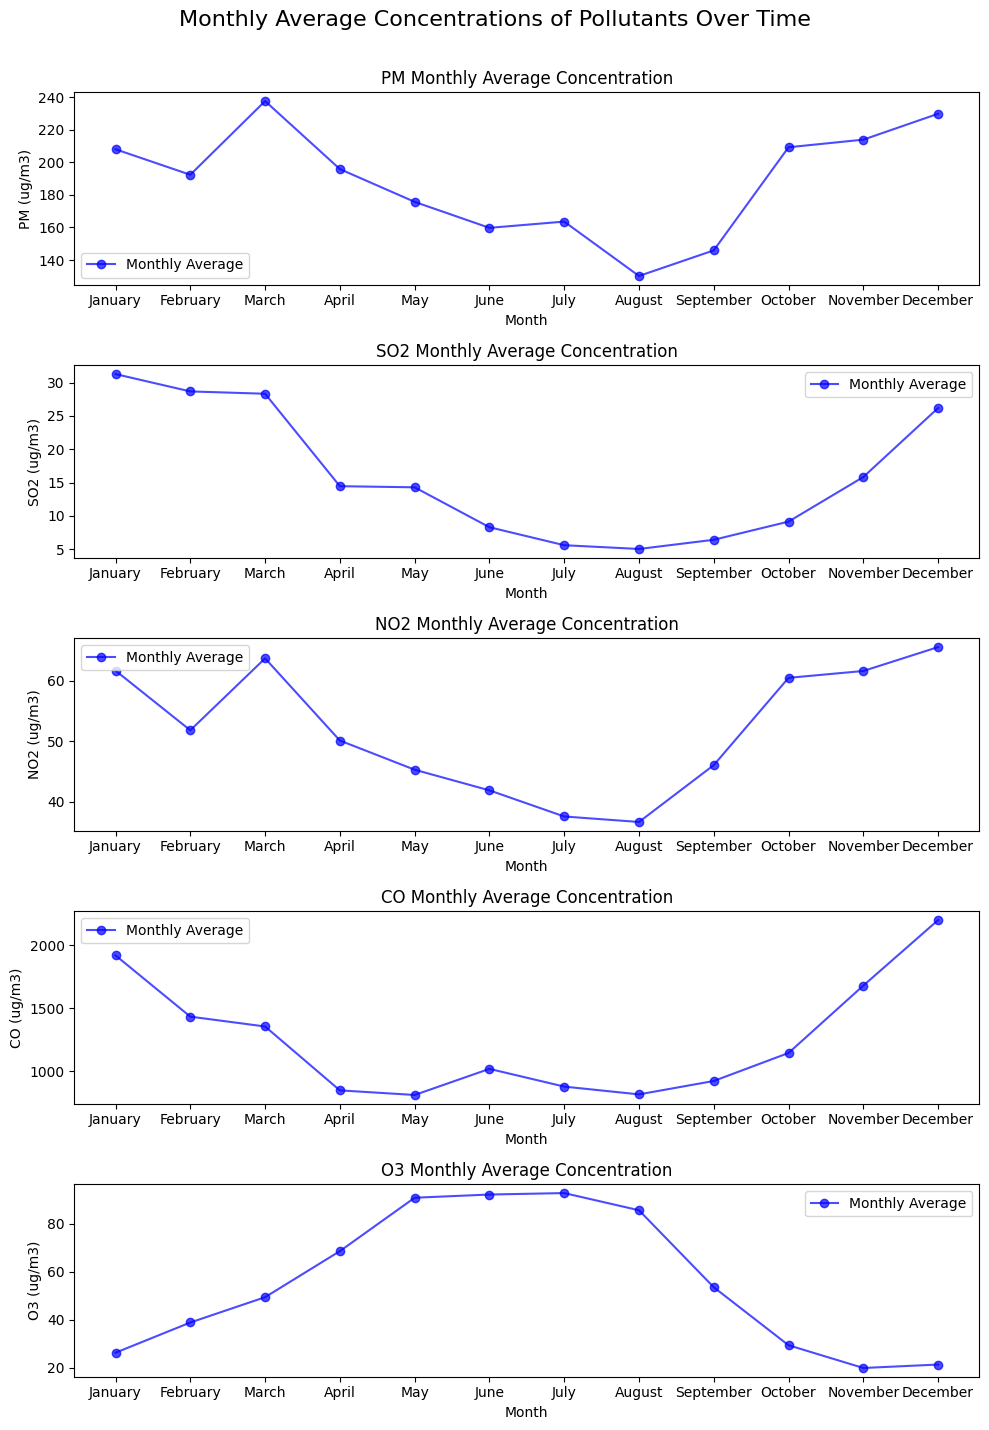

In [ ]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

**POLLUTANTS BY THE YEAR**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is in datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['PM', 'NO2', 'SO2', 'CO','O3',]
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year, and calculating mean for each pollutant
df1['year'] = df1['Date'].dt.year
df_yearly = df1.groupby('year')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Yearly Pollutant Levels"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_yearly.index.astype(str),  # Convert Year to string for x-axis
            y=df_yearly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Yearly Pollutant Levels",
    xaxis_title="Year",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


CALCULATING AQI

In [ ]:
import pandas as pd

# === AQI Calculation Functions ===
def calculate_aqi(concentration, breakpoints):
    for Clow, Chigh, Ilow, Ihigh in breakpoints:
        if Clow <= concentration <= Chigh:
            return round((Ihigh - Ilow) / (Chigh - Clow) * (concentration - Clow) + Ilow)
    return None

def aqi_for_all_pollutants(values):
    breakpoints_data = {
        'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
        'PM10':  [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
        'NO2':   [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
        'SO2':   [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
        'CO':    [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)],
        'O3':    [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 300, 301, 400), (301, 400, 401, 500)]
    }

    individual_aqi = {}
    for pollutant, value in values.items():
        bp = breakpoints_data.get(pollutant)
        if bp and pd.notnull(value):
            individual_aqi[pollutant] = calculate_aqi(value, bp)
    overall_aqi = max(individual_aqi.values()) if individual_aqi else None
    return overall_aqi, individual_aqi

# === Load your CSV ===
df = pd.read_csv("combined_output.csv")

# === Calculate AQI row by row ===
aqi_values = []
for _, row in df.iterrows():
    pollutant_values = {
        'PM2.5': row.get('PM2.5'),
        'PM10': row.get('PM10'),
        'NO2': row.get('NO2'),
        'SO2': row.get('SO2'),
        'CO': row.get('CO'),
        'O3': row.get('O3')
    }
    overall_aqi, _ = aqi_for_all_pollutants(pollutant_values)
    aqi_values.append(overall_aqi)

# === Add AQI to DataFrame and save ===
df['AQI'] = aqi_values
df.to_csv("aqi_calculated.csv", index=False)

print("AQI calculated and saved to 'aqi_calculated.csv'")


TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [ ]:
import pandas as pd

# === AQI Calculation Functions ===
def calculate_aqi(concentration, breakpoints):
    for Clow, Chigh, Ilow, Ihigh in breakpoints:
        if Clow <= concentration <= Chigh:
            return round((Ihigh - Ilow) / (Chigh - Clow) * (concentration - Clow) + Ilow)
    return 0  # Return 0 instead of None when concentration is outside breakpoints

def aqi_for_all_pollutants(values):
    breakpoints_data = {
        'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
        'PM10':  [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
        'NO2':   [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
        'SO2':   [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
        'CO':    [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)],
        'O3':    [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 300, 301, 400), (301, 400, 401, 500)]
    }

    individual_aqi = {}
    for pollutant, value in values.items():
        bp = breakpoints_data.get(pollutant)
        if bp and pd.notnull(value):
            individual_aqi[pollutant] = calculate_aqi(value, bp)

    # Handle case where individual_aqi.values() contains only None values
    if individual_aqi and all(val is None for val in individual_aqi.values()):
        overall_aqi = None  # Or assign a default value, e.g., 0
    else:
        overall_aqi = max(val for val in individual_aqi.values() if val is not None) if individual_aqi else None

    return overall_aqi, individual_aqi

# === Load your CSV ===
df = pd.read_csv("combined_output.csv")

# === Calculate AQI row by row ===
aqi_values = []
for _, row in df.iterrows():
    pollutant_values = {
        'PM2.5': row.get('PM2.5'),
        'PM10': row.get('PM10'),
        'NO2': row.get('NO2'),
        'SO2': row.get('SO2'),
        'CO': row.get('CO'),
        'O3': row.get('O3')
    }
    overall_aqi, _ = aqi_for_all_pollutants(pollutant_values)
    aqi_values.append(overall_aqi)

# === Add AQI to DataFrame and save ===
df['AQI'] = aqi_values
df.to_csv("aqi_calculated.csv", index=False)

print("AQI calculated and saved to 'aqi_calculated.csv'")

AQI calculated and saved to 'aqi_calculated.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("aqi_calculated.csv")

# Convert date column to datetime (adjust name if needed)
#df['Date'] = pd.to_datetime(df['Date'])

# Optional: sort by date
df = df.sort_values('Date')

# Plot daily AQI
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['AQI'], marker='o', linestyle='-', alpha=0.7)
plt.title("Daily AQI Trend")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Date'

# CORRELATION

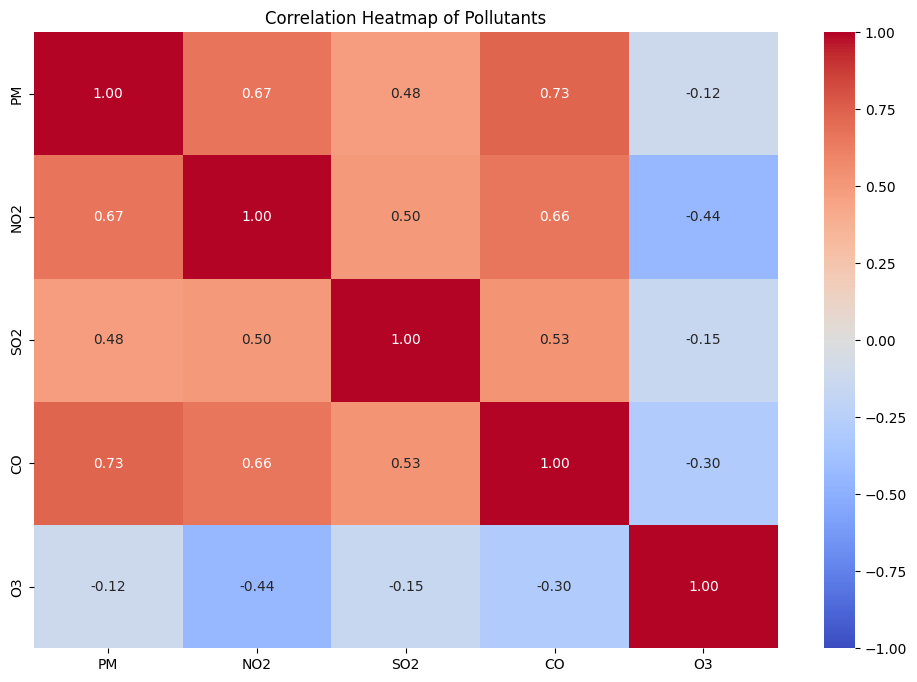

In [ ]:
# Filter the DataFrame to include only numeric columns
# This assumes you want to include only the pollutants columns
pollutants = ['PM', 'NO2', 'SO2', 'CO','O3']
numeric_pollutants_df = df1[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()


In [ ]:
numeric_pollutants_df.corr()

,PM,NO2,SO2,CO,O3
PM,1.000000,0.666812,0.476564,0.729652,-0.123321
NO2,0.666812,1.000000,0.496466,0.663670,-0.438335
SO2,0.476564,0.496466,1.000000,0.525397,-0.153708
CO,0.729652,0.663670,0.525397,1.000000,-0.295855
O3,-0.123321,-0.438335,-0.153708,-0.295855,1.000000


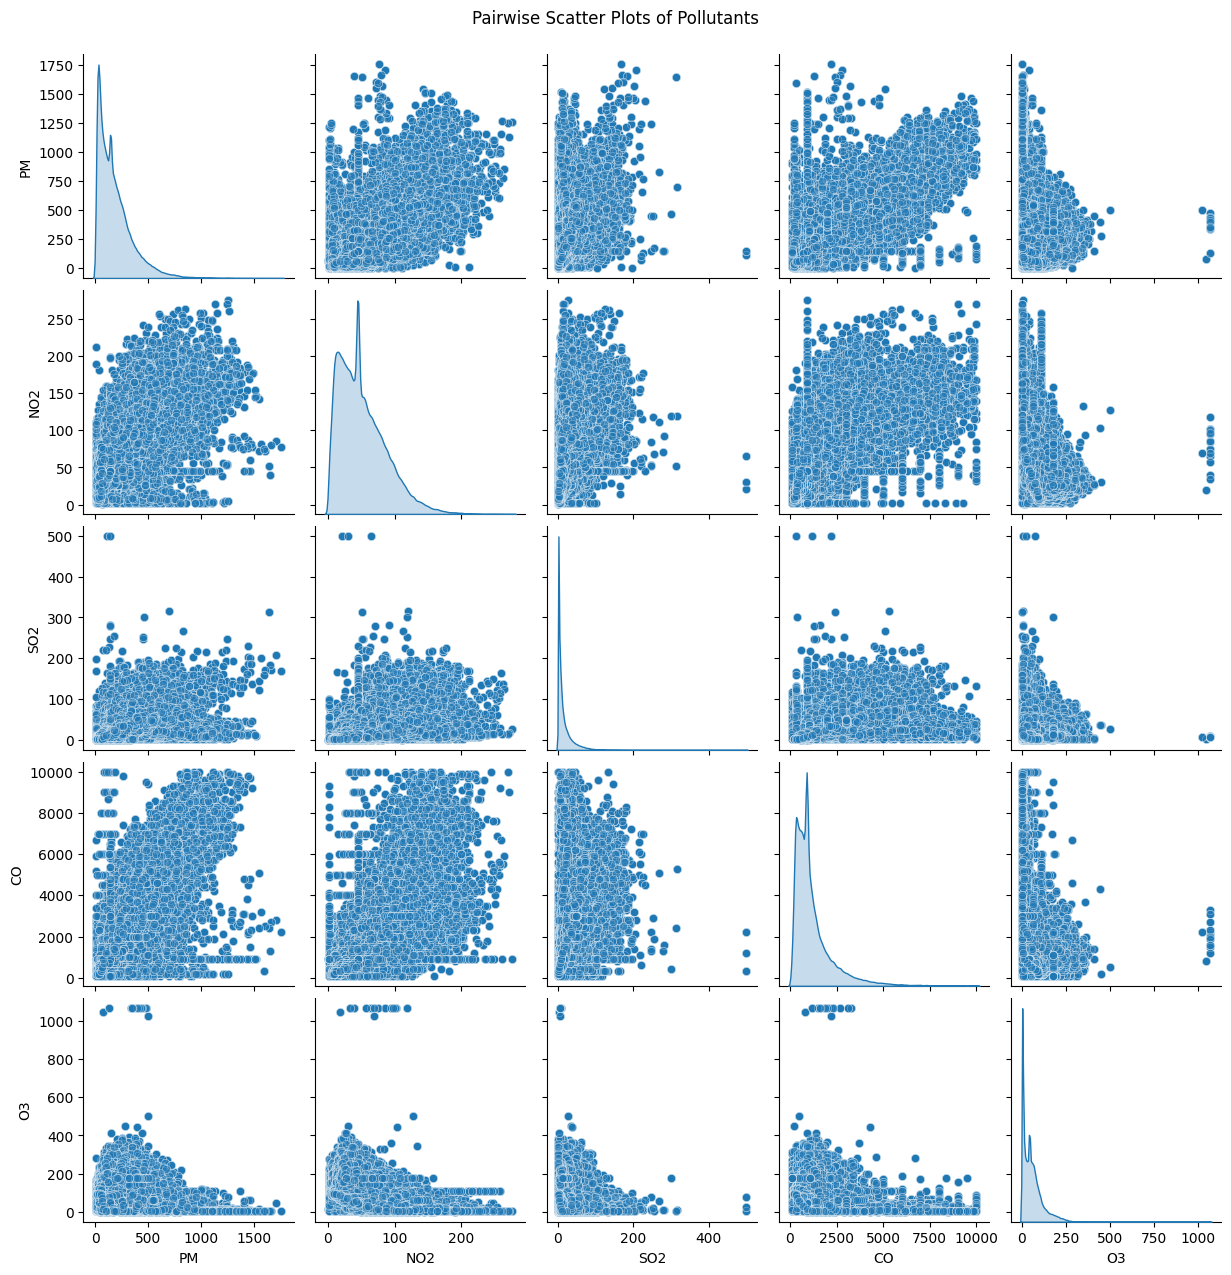

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it contains the pollutant columns
pollutants = ['PM', 'NO2', 'SO2', 'CO', 'O3']

# Filter the DataFrame to include only the pollutant columns
pollutants_df = df1[pollutants]

# Ensure all columns are numeric
pollutants_df = pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pollutants_df = pollutants_df.dropna()

# Create scatter plots between each pair of pollutants
# Use pairplot from seaborn to plot all pairwise scatter plots
sns.pairplot(pollutants_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots of Pollutants', y=1.02)
plt.show()